>- 텍스트 데이터의 벡터의 크기는 해당 문서를 나타내는 벡터의 길이를 의미
- 길이는 일반적으로 해당 문서에서 사용된 단어의 빈도수, TF-IDF (Term Frequency-Inverse Document Frequency) 등과 같은 방법을 사용하여 계산됩니다.
- 벡터의 크기는 텍스트 데이터의 중요도를 나타내며, 더 긴 벡터는 해당 문서가 더 많은 단어로 이루어져 있거나, 특정 단어나 구절이 여러 번 반복되었음을 나타냅니다.

- 코사인 유사도에서는 벡터의 방향이 더 중요하며, 이는 각 문서가 얼마나 비슷한 방향으로 단어들을 사용했는지를 나타냅니다. 따라서 코사인 유사도는 두 벡터 사이의 각도에 따라서 문서의 유사성을 판단하며, 벡터의 크기는 이 과정에서는 무시됩니다.

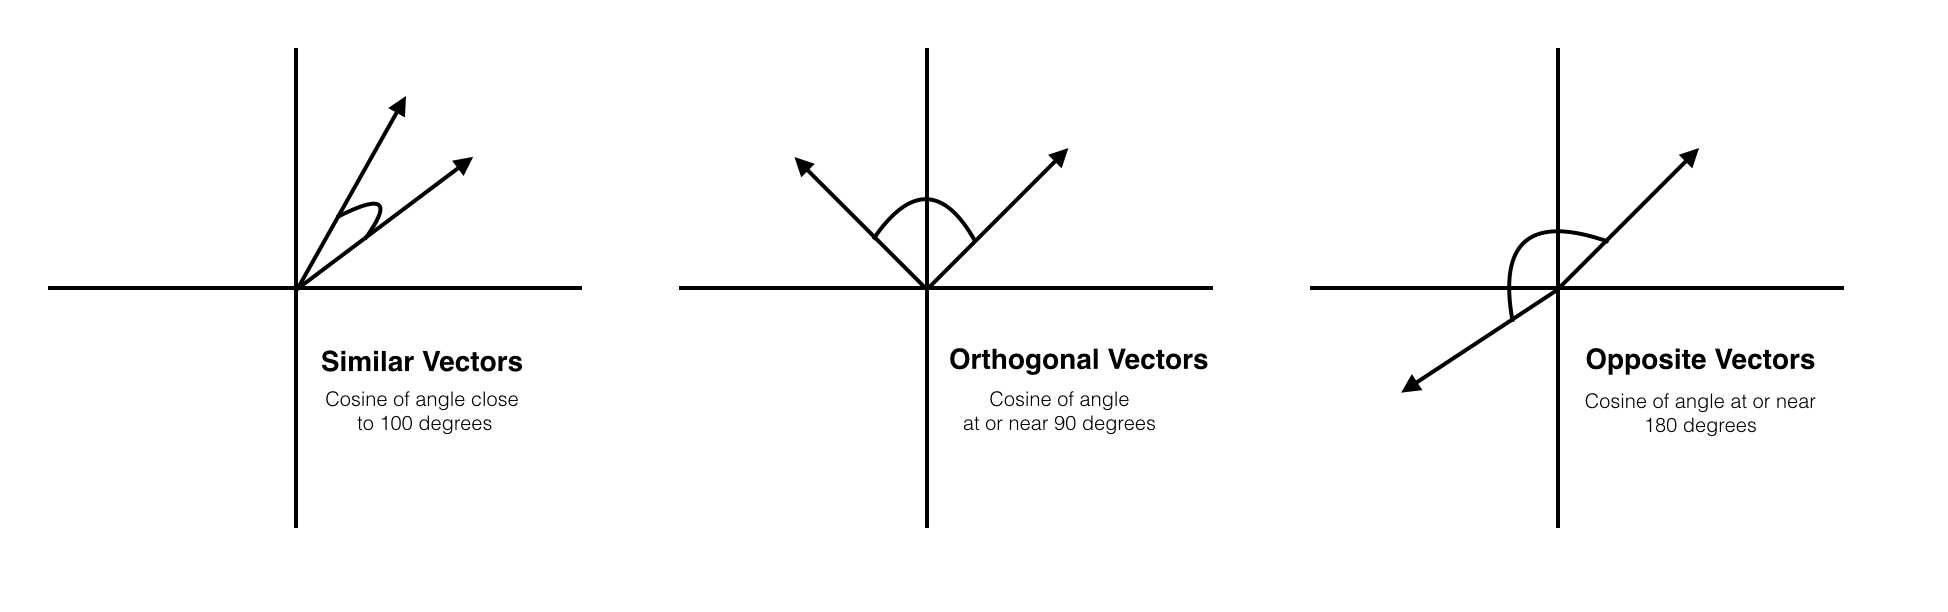

- 예각 : 유사한 벡터
- 직각 : 관련성이 x
- 둔각 : 반대 관계의 벡터

> - 이전까지의 실습에서 사용했던 문서와 문서 간의 벡터 간의 크기에 기반한 유사도 지표 (ex. 유클리디안 거리)는 정확도가 떨어지기 쉽다.
- **문서가 매우 긴 경우 단어의 빈도수가 당연히 많기에, 이러한 빈도수에만 기반해서는 공정한 비교가 불가능**
- A 문서가 B 문서보다 10배 길기에, '머신러닝'이라는 단어가 2배 더 많다고, 머신러닝과 더 밀접한 관계에 있는 text가 절대 아님

In [49]:
# 코사인 유사도를 기반으로 문서 유사도를 구하는 함수 cos_similarity
import numpy as np

def cos_similarity(v1, v2):
    dot_product = np.dot(v1, v2)
    l2_norm = (np.sqrt(sum(np.square(v1))) * np.sqrt(sum(np.square(v2))))
    similarity = dot_product / l2_norm

    return similarity

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list = ['if you take the blue pill, the story ends' ,
            'if you take the red pill, you stay in Wonderland',
            'if you take the red pill, I show you how deep the rabbit hole goes']

tfidf_vect_simple = TfidfVectorizer()
feature_vect_simple = tfidf_vect_simple.fit_transform(doc_list) # CSR 형식으로 반환

print(feature_vect_simple.shape)

(3, 18)


In [51]:
feature_vect_simple

<3x18 sparse matrix of type '<class 'numpy.float64'>'
	with 29 stored elements in Compressed Sparse Row format>

- 대부분 값이 0으로 채워진 행렬을 희소 행렬(Sparse Matrix)
-  반대로 대부분의 값이 0이 아닌 값으로 채워진 행렬은 밀집 행렬(Dense Matrix)
- 희소 행렬을 표현하는 방식 => COO, CSR
- 따라서 이 경우 개념적으로는 행렬로 생각하는 게 편한 경우라도, 실제 데이터는 다르게 표현하는 것이 좋습니다. 희소행렬을 표현하는 방식에는 coo, csr 등이 있고, 원소 값이 0이 아닌 부분에 대해서만 좌표와 값을 저장하고 나머지는 모두 0으로 간주하는 것


>- 예를 들어 추천 시스템을 만들기 위해 어떤 고객이 어떤 영화에 별점을 몇 개 주었는지를 나타내는 행렬을 이용하고자 합니다. 그런데 고객은 100만 명이 있고 영화 10만개가 있다고 하겠습니다. 그러면 100만 x 10만 크기의 행렬을 만들어야 합니다. 원소 하나가 1바이트(int8)이라 해도 1테라바이트 크기의 메모리가 필요합니다.
- 그런데 위 행렬은 원소가 대부분 0인 희소행렬일 것입니다. 사람 한 명이 영화를 아무리 많이 봤자 1만 개보다는 적을 것입니다. 그러면 나머지 9만 개 영화에 대해서는 행렬에 0으로 표현이 됩니다.
- 따라서 이 경우 개념적으로는 행렬로 생각하는 게 편한 경우라도, 실제 데이터는 다르게 표현하는 것이 좋습니다. 희소행렬을 표현하는 방식에는 coo, csr 등이 있다.

- 또 다른 방법으로는 dok이 있다.

> **DOK 방식**  Dictionary of Keys
- dok는 좌표가 key이고 원소 값이 value인 딕셔너리 구조
-  희소행렬을 점진적으로 구축할 때 사용


```python
# 3 x 4 크기의 비어있는 행렬을 만든 후, 인덱싱을 통해 값을 하나씩 변경해감
from scipy.sparse import dok_matrix

m = dok_matrix((3, 4)) # 값이 0으로 채워진 (3, 4) 크기의 행렬을 만듭니다.
m[0, 1] = 4
m[2, 3] = 9
m.toarray()

# toarray() => 밀집 행렬로!
```
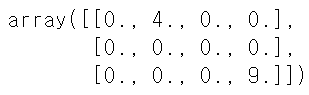



> **toarray()와 todense()**
- toarray()와 todense()는 둘 다 희소 행렬을 밀집 배열로 변환하는 데 사용되는 메서드입니다. 그러나 이 둘 간에는 작은 차이가 있습니다.

1. **`toarray()`**: 이 메서드는 SciPy를 사용하여 표현한 희소 행렬을 밀집 배열로 변환합니다. SciPy에서는 CSR, CSC, COO 등의 희소 행렬 형식을 지원하며, 이러한 형식으로 표현된 희소 행렬을 밀집 배열로 변환할 때 `toarray()` 메서드를 사용합니다.

2. **`todense()`**: 이 메서드는 NumPy의 행렬 형식을 사용하여 희소 행렬을 밀집 배열로 변환합니다. 이는 주로 SciPy의 CSR 행렬이나 CSC 행렬과 같은 희소 행렬을 NumPy의 2차원 배열(=> 행렬)로 변환할 때 사용됩니다.

- 1차원 : 배열,  데이터 요소를 일렬로 나열한 것

- 간단히 말해, `toarray()`는 SciPy에서 제공하는 희소 행렬 객체에 특화되어 있고, `todense()`는 NumPy의 행렬 객체에 특화되어 있습니다. 두 메서드는 모두 같은 목적을 가지고 있으며, 희소 행렬을 밀집 배열로 변환하는 데 사용됩니다.



```python
import numpy as np
from scipy.sparse import csr_matrix

# 희소 행렬 생성
sparse_matrix = csr_matrix([[0, 0, 1], [0, 2, 0], [3, 0, 4]])

# toarray() 사용 예제
dense_array_toarray = sparse_matrix.toarray()
print("Using toarray():\n", dense_array_toarray)

# todense() 사용 예제
dense_array_todense = sparse_matrix.todense()
print("\nUsing todense():\n", dense_array_todense)
```



In [52]:
###todense() vs toarray()###
import numpy as np
from scipy.sparse import csr_matrix

# 희소 행렬 생성
sparse_matrix = csr_matrix([[0, 0, 1], [0, 2, 0], [3, 0, 4]])

# toarray() 사용 예제
dense_array_toarray = sparse_matrix.toarray()
print("Using toarray():\n", dense_array_toarray)

# todense() 사용 예제
dense_array_todense = sparse_matrix.todense()
print("\nUsing todense():\n", dense_array_todense)


Using toarray():
 [[0 0 1]
 [0 2 0]
 [3 0 4]]

Using todense():
 [[0 0 1]
 [0 2 0]
 [3 0 4]]


In [53]:
type(dense_array_toarray)

numpy.ndarray

In [54]:
type(dense_array_todense)

numpy.matrix

> - 차원 제한: numpy.ndarray는 다양한 차원의 배열을 효율적으로 다룰 수 있습니다. 반면에 numpy.matrix는 항상 2차원 배열로 처리됩니다. 즉, numpy.matrix는 항상 행렬(matrix)로 간주됩니다.
- 연산: numpy.matrix는 행렬 연산에 특화되어 있습니다. 따라서 행렬 곱셈, 역행렬 등과 같은 선형 대수 연산을 보다 직관적으로 수행할 수 있습니다. 반면에 numpy.ndarray는 일반적인 다차원 배열로 여러 종류의 연산을 수행할 수 있습니다.

In [55]:
# TFidfVectorizer로 transform()한 결과는 Sparse Matrix이므로 Dense Matrix로 변환.
feature_vect_dense = feature_vect_simple.todense()
# todense() :  0이 포함된 행렬로 변환

#첫번째 문장과 두번째 문장의 feature vector  추출
vect1 = np.array(feature_vect_dense[0]).reshape(-1,) # 배열을 1차원으로 변환
vect2 = np.array(feature_vect_dense[1]).reshape(-1,)

# 첫번째 문장과 두번째 문장의 feature vector로 두개 문장의 Cosine 유사도 추출
similarity_simple = cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [56]:
vect1 = np.array(feature_vect_dense[0]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect1, vect3 )
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2 = np.array(feature_vect_dense[1]).reshape(-1,)
vect3 = np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple = cos_similarity(vect2, vect3 )
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


> 사이킷런은 코사인 유사도를 측정하기 위해 **sklearn.metrics.pairwise.cosine_similarity API**를 제공

In [57]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair = cosine_similarity(feature_vect_simple[0] , feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


- cosine_similarity()는 쌍(pair)으로 코사인 유사도 값을 제공 가능

In [58]:
similarity_simple_pair = cosine_similarity(feature_vect_simple , feature_vect_simple)
print(similarity_simple_pair)
print('shape:',similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


### **Opinion Review 데이터 세트를 이용한 문서 유사도 측정**


In [59]:
from nltk.stem import WordNetLemmatizer
import nltk
import string

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
# 구두점 문자를 제거하기 위해 사용할 사전, 구두점 문자를 키(key)로 사용하고 값(value)은 None으로 설정
# ord : 문자의 유니코드 코드 포인트를 반환하는 파이썬의 내장 함수
# string.punctuation : 텍스트에서 사용된 구두점(punctuation - 쉼표, 마침표, 물음표, 느낌표 등의 문자)의 문자열 list
lemmar = WordNetLemmatizer()

# 입력으로 들어온 token단어들에 대해서 lemmatization 어근 변환
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

# TfidfVectorizer 객체 생성 시 tokenizer 인자로 해당 함수를 설정하여 lemmatization 적용
# 입력으로 문장을 받아서 stop words 제거-> 소문자 변환 -> 단어 토큰화 -> lemmatization 어근 변환.
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))
# nltk.word_tokenize() : 문자열을 단어 단위로 토큰화하여 단어들의 리스트를 반환
# translate() 메서드 : 문자열의 각 문자를 다른 문자로 변환하거나 제거하는 데 사용

# 입력된 텍스트를 소문자로 변환한 후, 구두점을 제거하고 단어로 토큰화합니다.
# 그런 다음 토큰화된 결과를 LemTokens 함수에 전달하여 각 토큰의 어근을 찾고 반환합니다.

In [60]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [61]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [101]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')

path = r'/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics'
all_files = glob.glob(os.path.join(path, "*.data"))
filename_list = []
opinion_text = []

for file_ in all_files:
    df = pd.read_table(file_,index_col=None, header=0,encoding='latin1')
    filename_ = file_.split('/')[-1]
    filename = filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

In [102]:
filename_list

['eyesight-issues_amazon_kindle',
 'speed_garmin_nuvi_255W_gps',
 'food_holiday_inn_london',
 'price_holiday_inn_london',
 'navigation_amazon_kindle',
 'interior_toyota_camry_2007',
 'service_bestwestern_hotel_sfo',
 'battery-life_netbook_1005ha',
 'updates_garmin_nuvi_255W_gps',
 'location_bestwestern_hotel_sfo',
 'satellite_garmin_nuvi_255W_gps',
 'transmission_toyota_camry_2007',
 'buttons_amazon_kindle',
 'interior_honda_accord_2008',
 'price_amazon_kindle',
 'performance_honda_accord_2008',
 'room_holiday_inn_london',
 'location_holiday_inn_london',
 'features_windows7',
 'comfort_honda_accord_2008',
 'food_swissotel_chicago',
 'mileage_honda_accord_2008',
 'free_bestwestern_hotel_sfo',
 'fonts_amazon_kindle',
 'gas_mileage_toyota_camry_2007',
 'service_holiday_inn_london',
 'screen_garmin_nuvi_255W_gps',
 'parking_bestwestern_hotel_sfo',
 'bathroom_bestwestern_hotel_sfo',
 'rooms_bestwestern_hotel_sfo',
 'sound_ipod_nano_8gb',
 'performance_netbook_1005ha',
 'battery-life_ipod_na

In [103]:
all_files[0]

'/content/drive/MyDrive/Kaggle - 파이썬 머신러닝 완벽 가이드/kaggleData/OpinosisTopics/eyesight-issues_amazon_kindle.txt.data'

In [104]:
opinion_text[0]

"                                                                                                                                                                                          It feels as easy to read as the K1 but doesn't seem any crisper to my eyes   .\n0                                                                                                                                                            the white is really GREY, and to avoid considerable eye, strain I had to refresh pages   every other page .\n1                                    The dream has always been a portable electronic device that could hold a ton of reading material, automate subscriptions and facilitate quick easy downloads, and be as portable, as easy on the eyes, and as intuitive as a book .\n2                                                                                                                                                                                                      th

In [105]:
readexample = pd.read_table(all_files[0],index_col=None, header=0,encoding='latin1')
readexample

,It feels as easy to read as the K1 but doesn't seem any crisper to my eyes .
0,"the white is really GREY, and to avoid consid..."
1,The dream has always been a portable electron...
2,"they would ask, to which I would squint my e..."
3,I found that the Kindle 2 is immediately appe...
4,No having to turn away every few minutes to r...
...,...
74,The print is easy on the eye and the light we...
75,"The Text, to, Speech function is great for ti..."
76,I have an eye issue and noticed it was gett...
77,I enjoy having the text at the largest size b...


In [106]:
document_df = pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english' , ngram_range=(1,2), min_df=0.05, max_df=0.85 )
feature_vect = tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster = KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_
document_df['cluster_label'] = cluster_label

> 코사인 유사도를 사용하여 문서 간의 유사성을 평가할 때, TF-IDF 값의 크기보다는 각 특징 벡터의 방향이 더 중요합니다. TF-IDF는 각 단어의 상대적 중요성을 나타내는데, 이 중요성은 문서 내에서의 출현 빈도와 문서 집합 전체에서의 출현 빈도에 기반합니다. 그러나 코사인 유사도는 벡터 간의 각도를 측정하여 유사성을 평가하는데, 이는 벡터의 방향에만 의존합니다. 따라서 각 문서를 TF-IDF로 벡터화한 후, 이러한 벡터의 방향을 비교하여 문서의 유사성을 평가하는 것이 보다 의미가 있습니다. TF-IDF 값의 크기는 중요하지만, 주로 벡터의 방향이 유사성을 결정하는 데 더 큰 역할을 합니다.

- 어차피 벡터의 방향이 중요하기에, countvectorizer로 피처 벡터화를 사용해도 괜찮다.
- 코사인 유사도를 사용하여 텍스트 유사성을 판단할 때, TF-IDF 대신 CountVectorizer를 사용하여 단어의 출현 빈도를 벡터화할 수 있습니다. CountVectorizer는 각 문서에서 단어의 출현 빈도를 단순히 계수하여 벡터를 생성하므로, TF-IDF와 달리 단어의 상대적인 중요성을 고려하지 않습니다. 그러나 코사인 유사도는 벡터의 방향에만 의존하기 때문에, TF-IDF나 단순한 단어 출현 빈도 벡터 모두 유사성을 판단하는 데 사용할 수 있습니다. 따라서 TF-IDF를 사용할지 CountVectorizer를 사용할지는 데이터와 문제에 따라 다를 수 있지만, 코사인 유사도를 통해 텍스트 유사성을 평가하는 데 둘 다 사용할 수 있습니다. CountVectorizer를 사용하면 단어의 출현 빈도만을 고려하므로 더 간단한 모델을 구축할 수 있습니다.

In [107]:
# 호텔을 주제로 군집화된 문서를 이용해 특정 문서와 다른 문서 간의 유사도 계산
from sklearn.metrics.pairwise import cosine_similarity

# cluster_label=2인 데이터는 호텔로 클러스터링된 데이터임. DataFrame에서 해당 Index를 추출
hotel_indexes = document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

# 호텔로 클러스터링된 데이터 중 첫번째 문서를 추출하여 파일명 표시.
comparison_docname = document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명 ',comparison_docname,' 와 타 문서 유사도######')

''' document_df에서 추출한 Index 객체를 feature_vect로 입력하여 호텔 클러스터링된 feature_vect 추출
이를 이용하여 호텔로 클러스터링된 문서 중 첫번째 문서와 다른 문서간의 코사인 유사도 측정.'''
similarity_pair = cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Int64Index([2, 3, 6, 9, 16, 17, 20, 22, 25, 27, 28, 29, 33, 34, 37, 48], dtype='int64')
##### 비교 기준 문서명  food_holiday_inn_london  와 타 문서 유사도######
[[1.         0.21242179 0.28935552 0.11008256 0.15836737 0.18388305
  0.84955849 0.06104731 0.34678827 0.05267947 0.0430688  0.14089226
  0.12209189 0.24657221 0.12513566 0.09611626]]


> **hotel 관련 첫 번째 문서와 다른 hotel 관련 문서 간의 text 유사도**
- 첫번째 문서와의 유사도가 높은 순으로 정렬 후 시각화


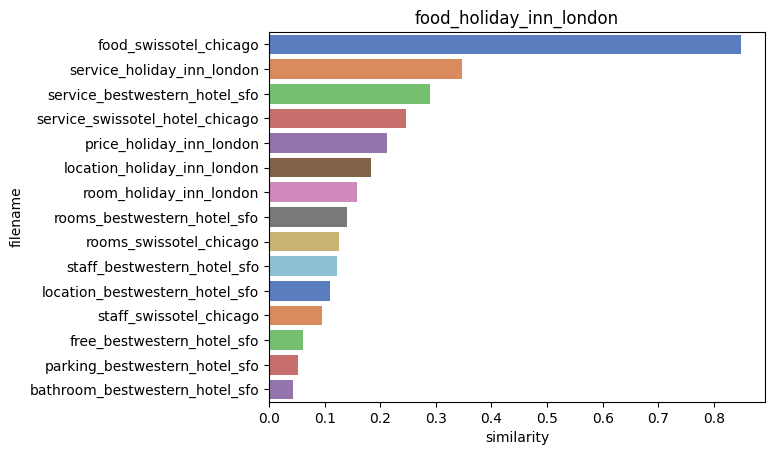

In [110]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# argsort()를 이용하여 앞예제의 첫번째 문서와 타 문서간 유사도가 큰 순으로 정렬한 인덱스
sorted_index = similarity_pair.argsort()[: , ::-1]
sorted_index = sorted_index[:,1:]

# sorted_index는 원래 2차원이었음
# 유사도가 큰 순으로 hotel_indexes를 추출하여 재정렬.
hotel_sorted_indexes = hotel_indexes[sorted_index.reshape(-1)] # reshape(-1, )

# 유사도가 큰 순으로 유사도 값을 재정렬하되 자기 자신은 제외
hotel_1_sim_value = np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value = hotel_1_sim_value[1:]

# 유사도가 큰 순으로 정렬된 Index와 유사도값을 이용하여 파일명과 유사도값을 Seaborn 막대 그래프로 시각화
hotel_1_sim_df = pd.DataFrame()
hotel_1_sim_df['filename'] = document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity'] = hotel_1_sim_value

fig1 = plt.gcf() # get current figure
sns.barplot( x = 'similarity', y = 'filename', data = hotel_1_sim_df, palette='muted')
plt.title(comparison_docname)
fig1.savefig('p553_hotel.tif', format='tif', dpi=300, bbox_inches='tight')

- Matplotlib에서는 Figure 객체가 그래프나 도표를 담는 컨테이너 역할을 합니다. plt.gcf() 함수를 사용하면 현재 작업 중인 Figure 객체에 대한 참조를 얻을 수 있습니다. 이를 통해 그래프의 속성을 변경하거나 저장할 수 있습니다.

- 예를 들어, plt.gcf().savefig('figure.png')와 같이 사용하여 현재 그래프를 이미지 파일로 저장할 수 있습니다.




